# Case Study on Probability for Data Science
# Problem Statement: 
To make a suitable machine learning algorithm to predict if the mushroom is 
edible or poisonous (e or p) using the given dataset.
(Along with other ML algorithms, Naïve Bayes’ Classifier should be applied)
Also, if some data pre-processing is necessary do that as well.
# Attribute Information:
• cap-shape: bell=b, conical=c, convex=x, flat=f, knobbed=k, sunken=s

• cap-surface: fibrous=f, grooves=g, scaly=y, smooth=s

• cap-colour: brown=n, buff=b, cinnamon=c, Gray=g, green=r, pink=p, purple=u,red=e, white=w, yellow=y

• bruises: bruises=t, no=f 

• odour: almond=a, anise=l, creosote=c, fishy=y, foul=f, musty=m, none=n,pungent=p, spicy=s 

• gill-attachment: attached=a, descending=d, free=f, notched=n 

• gill-spacing: close=c, crowded=w, distant=d 

• gill-size: broad=b, narrow=n 

• gill-colour: black=k, brown=n, buff=b, chocolate=h, grey=g, green=r, orange=o, pink=p, purple=u, red=e, white=w, yellow=y 

• stalk-shape: enlarging=e, tapering=t 

• Stalk-root: bulbous=b, club=c, cup=u, equal=e, rhizomorphs=z, rooted=r, missing=? 

• stalk-surface-above-ring: fibrous=f, scaly=y, silky=k, smooth=s 

• stalk-surface-below-ring: fibrous=f, scaly=y, silky=k, smooth=s 

• stalk-colour-above-ring: brown=n, buff=b, cinnamon=c, gray=g, orange=o,pink=p, red=e, white=w, yellow=y 

• stalk-colour-below-ring: brown=n, buff=b, cinnamon=c, gray=g, orange=o,pink=p, red=e, white=w, yellow=y 

• veil-type: partial=p, universal=u 

• veil-colour: brown=n, orange=o, white=w, yellow=y 

• ring-number: none=n, one=o, two=t 

• ring-type: cobwebby=c, evanescent=e, flaring=f, large=l, none=n, pendant=p,sheathing=s, zone=z 

• spore-print-colour: black=k, brown=n, buff=b, chocolate=h, green=r, orange=o,purple=u, white=w, yellow=y 

• population: abundant=a, clustered=c, numerous=n, scattered=s, several=v,solitary=y 

• habitat: grasses=g, leaves=l, meadows=m, paths=p, urban=u, waste=w,
woods=d 

# 1.Importing the python libraries

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

# 2.Reading the dataset to the python environment

In [2]:
data=pd.read_csv('/content/mushrooms.csv')
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g


# 3.Data analysis

In [3]:
data.shape

(8124, 23)

There are 8124 rows and 23 columns in the given dataset.

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [5]:
data.isna().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [6]:
data.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,2,5,4,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,t,b,s,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,4608,3776,5176,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


From the above shows numerical analysis of the given dataset.We can understand that the above does not show any mean,std etc.. beacause the given dataset contains only categorical informations.The above also shows values and their frequency in each column.

# 4.Preprocessing of dataset

In [7]:
#check and dectect missing values
data.isna().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

There are not any values in the given dataset.

In [8]:
#Label encoder
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for column in data.columns:
   data[column]=le.fit_transform(data[column])

In [9]:
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,0,3,2,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,0,2,2,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,0,2,2,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,0,3,2,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,1,3,2,2,7,7,0,2,1,0,3,0,1


Now we see that all the column values are converted to ordinal and there are no categorical values left!

Also, the column “veil-type” is 0 and not contributing to the data so we’ll remove it.

In [10]:
data['veil-type']

0       0
1       0
2       0
3       0
4       0
       ..
8119    0
8120    0
8121    0
8122    0
8123    0
Name: veil-type, Length: 8124, dtype: int64

In [11]:
data=data.drop(['veil-type'],axis=1)

In [12]:
# Split the dataset
x=data.drop(['class'],axis=1)
y=data['class']

In [13]:
#Standardization
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=scaler.fit_transform(x)
x=pd.DataFrame(x)

In [14]:
x.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
count,8.124000e+03,8.124000e+03,8.124000e+03,8.124000e+03,8.124000e+03,8.124000e+03,8.124000e+03,8.124000e+03,8.124000e+03,8.124000e+03,8.124000e+03,8.124000e+03,8.124000e+03,8.124000e+03,8.124000e+03,8.124000e+03,8.124000e+03,8.124000e+03,8.124000e+03,8.124000e+03,8.124000e+03
mean,-5.423612e-15,4.217659e-17,4.423065e-15,-1.797258e-14,-3.590486e-15,-2.478055e-14,8.422977e-15,8.636999e-15,1.302651e-14,-6.287000e-15,-7.627839e-14,5.016557e-15,1.023102e-15,1.695586e-14,-1.065692e-14,2.558990e-14,2.290006e-16,-2.067585e-14,5.804445e-14,-6.046588e-15,9.402621e-15
std,1.000062e+00,1.000062e+00,1.000062e+00,1.000062e+00,1.000062e+00,1.000062e+00,1.000062e+00,1.000062e+00,1.000062e+00,1.000062e+00,1.000062e+00,1.000062e+00,1.000062e+00,1.000062e+00,1.000062e+00,1.000062e+00,1.000062e+00,1.000062e+00,1.000062e+00,1.000062e+00,1.000062e+00
min,-2.087047e+00,-1.486157e+00,-1.769549e+00,-8.432296e-01,-1.970316e+00,-6.138869e+00,-4.388636e-01,-6.690383e-01,-1.358896e+00,-1.144806e+00,-1.045952e+00,-2.534652e+00,-2.372490e+00,-3.058611e+00,-3.038361e+00,-8.100146e+00,-3.945519e+00,-1.272216e+00,-1.509643e+00,-2.910546e+00,-8.771691e-01
25%,-8.403434e-01,-1.486157e+00,-5.910746e-01,-8.432296e-01,-1.019565e+00,1.628965e-01,-4.388636e-01,-6.690383e-01,-7.939470e-01,-1.144806e+00,-1.045952e+00,-9.254372e-01,-8.930529e-01,9.657680e-02,1.076554e-01,1.420366e-01,-2.561317e-01,-1.272216e+00,-6.701949e-01,-5.143892e-01,-8.771691e-01
50%,-2.169915e-01,1.401279e-01,-1.982498e-01,-8.432296e-01,4.065620e-01,1.628965e-01,-4.388636e-01,-6.690383e-01,5.347685e-02,8.735106e-01,-1.034815e-01,6.837777e-01,5.863847e-01,6.224414e-01,6.319914e-01,1.420366e-01,-2.561317e-01,-1.620674e-01,-2.504706e-01,2.843298e-01,-2.957297e-01
75%,1.029712e+00,9.532704e-01,1.373049e+00,1.185917e+00,4.065620e-01,1.628965e-01,-4.388636e-01,1.494683e+00,6.184261e-01,8.735106e-01,-1.034815e-01,6.837777e-01,5.863847e-01,6.224414e-01,6.319914e-01,1.420366e-01,-2.561317e-01,9.480809e-01,1.428426e+00,2.843298e-01,2.857098e-01
max,1.029712e+00,9.532704e-01,1.765874e+00,1.185917e+00,1.832689e+00,1.628965e-01,2.278612e+00,1.494683e+00,1.748325e+00,8.735106e-01,2.723931e+00,2.292993e+00,2.065822e+00,1.148306e+00,1.156327e+00,4.263128e+00,3.433255e+00,9.480809e-01,1.848151e+00,1.083049e+00,2.611468e+00


In [15]:
#Normalization
from sklearn.preprocessing import Normalizer
norm=Normalizer()
x=norm.fit_transform(x)
x=pd.DataFrame(x)

In [16]:
x.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
0,0.244678,0.033297,-0.047108,0.281795,0.209564,0.038707,-0.104282,0.355163,-0.054414,-0.272026,0.423307,0.162478,0.139335,0.147903,0.150172,0.033750,-0.060861,0.225281,-0.159250,-0.122228,0.482371
1,0.252143,0.034313,0.432405,0.290392,-0.482466,0.039888,-0.107463,-0.163826,-0.056074,-0.280325,0.205441,0.167435,0.143586,0.152416,0.154754,0.034780,-0.062718,0.232154,-0.061332,-0.321537,-0.072415
2,-0.525568,0.035288,0.345766,0.298642,-0.137040,0.041021,-0.110516,-0.168480,0.013467,-0.288289,0.211277,0.172191,0.147665,0.156745,0.159150,0.035768,-0.064500,0.238749,-0.063074,-0.330672,0.218369
3,0.228002,0.211076,0.304025,0.262589,0.195281,0.036069,-0.097175,0.330957,0.011841,-0.253487,0.394457,0.151404,0.129839,0.137823,0.139938,0.031450,-0.056714,0.209927,-0.148397,-0.113898,0.449495
4,0.210695,0.028672,-0.120943,-0.172538,0.083189,0.033331,0.466239,-0.136895,-0.046856,0.178734,0.364514,0.139911,0.119983,0.127361,0.129315,0.029063,-0.052408,-0.260315,-0.051250,-0.595542,-0.060511


# 5.Split the dataset into train and test data

In [17]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

In [18]:
x_train.shape

(6093, 21)

In [19]:
y_train.shape

(6093,)

In [20]:
x_test.shape

(2031, 21)

In [21]:
y_test.shape

(2031,)

# 6.Classification Methods

# ***Logistic regreesion***

In [22]:
from sklearn.linear_model import LogisticRegression
logit_model=LogisticRegression()
logit_model.fit(x_train,y_train)
y_pred_lr=logit_model.predict(x_test)

In [23]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score,classification_report

In [25]:
print("Logistic regression Classifier report: \n\n", classification_report(y_test, y_pred_lr))

Logistic regression Classifier report: 

               precision    recall  f1-score   support

           0       0.94      0.95      0.95      1040
           1       0.95      0.94      0.95       991

    accuracy                           0.95      2031
   macro avg       0.95      0.95      0.95      2031
weighted avg       0.95      0.95      0.95      2031



In [26]:
 confusion_matrix(y_test, y_pred_lr)

array([[990,  50],
       [ 58, 933]])

# ***KNN***

In [27]:
from sklearn.neighbors import KNeighborsClassifier
acc_values=[]
neighbors=np.arange(3,15)
for k in neighbors:
    classifier=KNeighborsClassifier(n_neighbors=k,metric='minkowski')
    classifier.fit(x_train,y_train)
    y_pred_kn=classifier.predict(x_test)
    acc=accuracy_score(y_test,y_pred_kn)
    acc_values.append(acc)

In [28]:
acc_values

[1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.999015263417036,
 0.999015263417036,
 0.999015263417036]

Text(0, 0.5, 'accuracy')

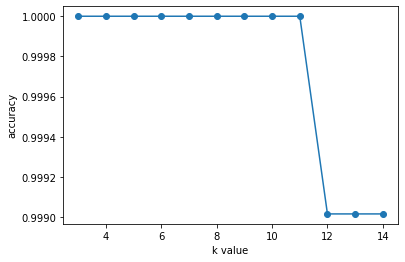

In [29]:
plt.plot(neighbors,acc_values,'o-')
plt.xlabel('k value')
plt.ylabel('accuracy')

In [30]:
classifier=KNeighborsClassifier(n_neighbors=4,metric='minkowski')
classifier.fit(x_train,y_train)
y_pred_kn=classifier.predict(x_test)

In [34]:
print("KNN Classifier report: \n\n", classification_report(y_test, y_pred_kn))

KNN Classifier report: 

               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1040
           1       1.00      1.00      1.00       991

    accuracy                           1.00      2031
   macro avg       1.00      1.00      1.00      2031
weighted avg       1.00      1.00      1.00      2031



In [32]:
confusion_matrix(y_test, y_pred_kn)

array([[1040,    0],
       [   0,  991]])

# ***SVM***

In [33]:
from sklearn.svm import SVC
svm = SVC(random_state=42,kernel='linear')
svm.fit(x_train, y_train)
y_pred_svm=svm.predict(x_test)

In [35]:
print("SVM Classifier report: \n\n", classification_report(y_test, y_pred_svm))

SVM Classifier report: 

               precision    recall  f1-score   support

           0       0.97      0.96      0.96      1040
           1       0.95      0.97      0.96       991

    accuracy                           0.96      2031
   macro avg       0.96      0.96      0.96      2031
weighted avg       0.96      0.96      0.96      2031



In [36]:
confusion_matrix(y_test, y_pred_svm)

array([[994,  46],
       [ 33, 958]])

# ***Decision Tree***

In [37]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)
y_pred_dt=dt.predict(x_test)

In [38]:
print("Decision Tree Classifier report: \n\n", classification_report(y_test, y_pred_dt))

Decision Tree Classifier report: 

               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1040
           1       0.99      1.00      1.00       991

    accuracy                           1.00      2031
   macro avg       1.00      1.00      1.00      2031
weighted avg       1.00      1.00      1.00      2031



In [39]:
confusion_matrix(y_test,y_pred_dt)

array([[1035,    5],
       [   2,  989]])

# *** Random forest classification*** 

In [40]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(x_train, y_train)
y_pred_rf=rf.predict(x_test)

In [41]:
print("Random forest Classifier report: \n\n", classification_report(y_test, y_pred_rf))

Random forest Classifier report: 

               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1040
           1       1.00      1.00      1.00       991

    accuracy                           1.00      2031
   macro avg       1.00      1.00      1.00      2031
weighted avg       1.00      1.00      1.00      2031



In [42]:
confusion_matrix(y_test,y_pred_rf)

array([[1040,    0],
       [   0,  991]])

# ***Naive Bayes Classification***

In [43]:
from sklearn.naive_bayes import GaussianNB
classifier=GaussianNB()
classifier.fit(x_train,y_train)
y_pred_Gu=classifier.predict(x_test)
y_pred_Gu

array([0, 1, 1, ..., 0, 0, 1])

In [44]:
confusion_matrix(y_test,y_pred_Gu)

array([[985,  55],
       [ 71, 920]])

In [45]:
accuracy_score(y_test,y_pred_Gu)

0.9379615952732644

# Result

From the confusion matrix, we saw that our train and test data is balanced.Most of the classification methods hit 100% accuracy with this dataset.From the above methods,KNN and Random forest are the best models compared to other models.There is any misclassification in the case of KNN and Random forest.They have also 100% accuracy.
